# Preprocessing 1 image and extracting features

We are testing out the techniques to be used for preprocessing and feature extraction for the Flavia dataset images using 1 image from the dataset.

### Importing libraries

In [ ]:
import cv2 # for transforming the images 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the image

In [ ]:
# To connect Google Drive with Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset path in the gdrive
dataset_path = "/content/drive/My Drive/Leaf_Classifier/Flavia_leaves/"

In [ ]:
# Choosing a random image from Flavia dataset 
test_img_path = dataset_path + "1544.jpg"
test_img_path

'/content/drive/My Drive/Leaf_Classifier/Flavia_leaves/1544.jpg'

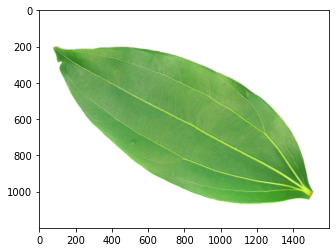

In [ ]:
main_img = cv2.imread(test_img_path) # reading image into variable main_image
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB) # convert an image from BGR to RGB
plt.imshow(img)

### Converting leaf image to grayscale

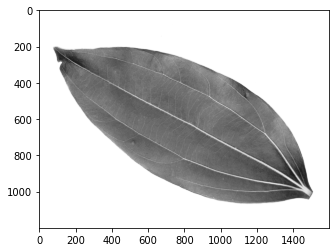

In [ ]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #converting image to gray scale
plt.imshow(gs,cmap='Greys_r') # plotting grayscale image

In [ ]:
gs.shape # Pixel length x breadth

(1200, 1600)

### Smoothing image using Guassian filter of size (25,25)

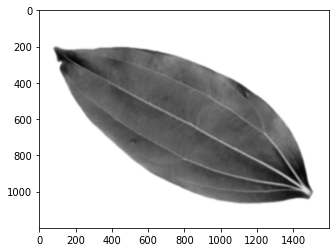

In [ ]:
blur = cv2.GaussianBlur(gs, (25,25),0) # low-pass filter that removes the high-frequency components
plt.imshow(blur,cmap='Greys_r') 

### Otsu's thresholding 

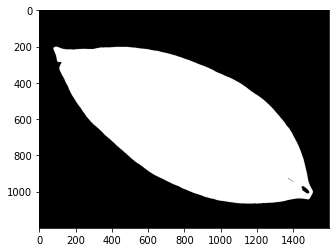

In [ ]:
# Thresholding done to separate background from foreground - leaf
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

### Closing of holes using Morphological Transformation


In [ ]:
kernel = np.ones((50,50),np.uint8) #kernel for closing operation 50x50
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel) #closing operation on binary image

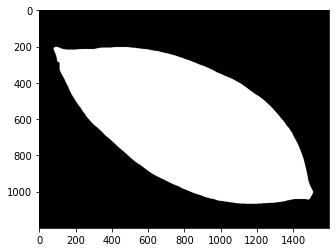

In [ ]:
plt.imshow(closing,cmap='Greys_r') # Leaf object is a smooth continuous white

Adaptive Thresholding


In [ ]:
# applying different thresholding  - can be ignored
# techniques on the input image 
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5) 
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
cv2.imshow('Adaptive Mean', thresh1) 
cv2.imshow('Adaptive Gaussian', thresh2)

error: ignored

# Boundary extraction


Boundary extraction using canny filter - Not effective

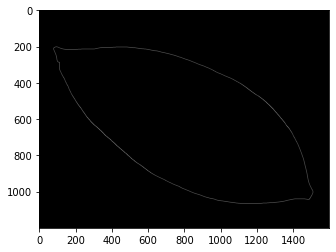

In [ ]:
cannyx64f = cv2.Canny(closing,cv2.CV_64F,0.67,1.33) # Canny filter applied
abs_Canny64f = np.absolute(cannyx64f) # 
Canny_8u = np.uint8(abs_Canny64f) # 
plt.imshow(abs_Canny64f,cmap='Greys_r') # 

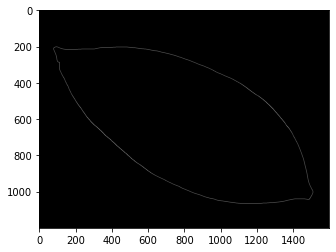

In [ ]:
ret_canny,im_bw_canny = cv2.threshold(Canny_8u,1,255,cv2.THRESH_BINARY) #
plt.imshow(im_bw_canny,cmap='Greys_r') # 

### Boundary extraction using sobel filters - Not effective



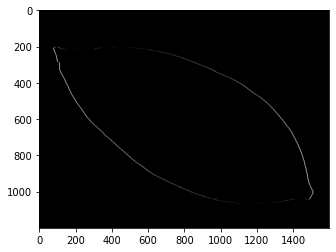

In [ ]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5) # sobel filter applied
abs_sobel64f = np.absolute(sobelx64f) # 
sobel_8u = np.uint8(abs_sobel64f) # 
plt.imshow(abs_sobel64f,cmap='Greys_r') # 

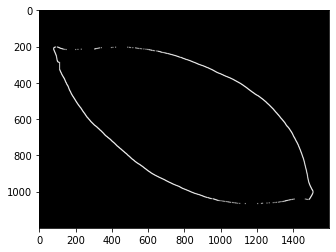

In [ ]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY) #
plt.imshow(im_bw_sobel,cmap='Greys_r') # 

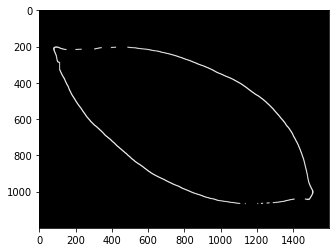

In [ ]:
kernel_edge = np.ones((15,15),np.uint8) 
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

### Boundary extraction using contours - Effective 


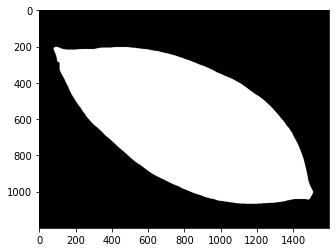

In [ ]:
plt.imshow(closing,cmap="Greys_r")

In [ ]:
contours,hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
len(contours)

1

In [ ]:
cnt = contours[0]
len(cnt)

1598

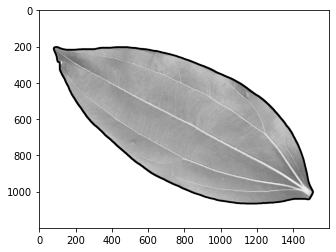

In [ ]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

## Morphological processing

## 1. Shape based features

### Calculating moments using contours

In [ ]:
M = cv2.moments(cnt)
M

{'m00': 755173.0,
 'm01': 474057296.8333333,
 'm02': 335461169329.0,
 'm03': 258413667354650.97,
 'm10': 619867698.5,
 'm11': 424246071662.75,
 'm12': 319256477476145.8,
 'm20': 596411232103.0,
 'm21': 430943618922711.1,
 'm30': 631618999416856.4,
 'mu02': 37873304454.425415,
 'mu03': 279375227845.09375,
 'mu11': 35126220257.56244,
 'mu12': -200421823260.70703,
 'mu20': 87606013108.5617,
 'mu21': -1116736926749.2969,
 'mu30': -1751543814914.25,
 'nu02': 0.06641104146387922,
 'nu03': 0.0005637307947035767,
 'nu11': 0.061594014665434196,
 'nu12': -0.0004044165066966669,
 'nu20': 0.15361761147720543,
 'nu21': -0.0022533815902255803,
 'nu30': -0.003534311879961067}

In [ ]:
area = cv2.contourArea(cnt)
area

755173.0

In [ ]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3859.9923211336136

### Fitting in the best-fit rectangle and ellipse


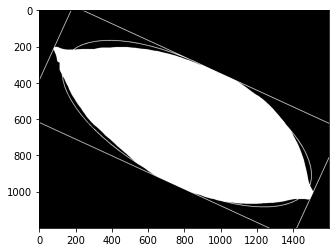

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

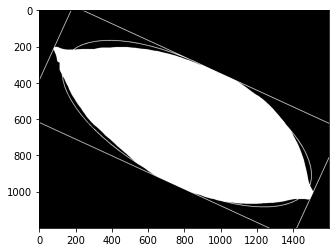

In [ ]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

### Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.6581691772885283

In [ ]:
rectangularity = w*h/area
rectangularity

1.6353246209808878

In [ ]:
circularity = ((perimeter)**2)/area
circularity

19.729970111763084

In [ ]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

980.5692870553753

In [ ]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

## 2. Color based features

### Calculating color based features - mean, std-dev of the RGB channels

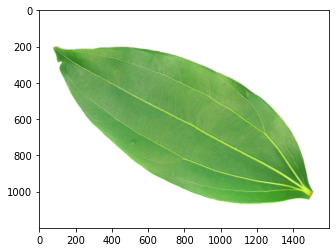

In [ ]:
plt.imshow(img,cmap="Greys_r")

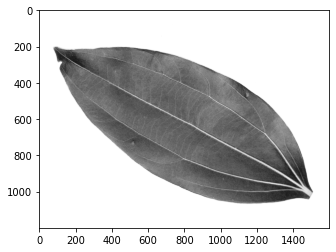

In [ ]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

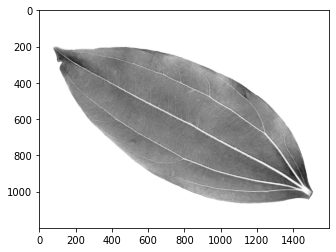

In [ ]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

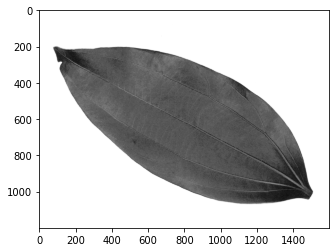

In [ ]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [ ]:
np.mean(blue_channel)

185.5493

In [ ]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [ ]:
red_mean = np.mean(red_channel)
red_mean

43.75261302083333

In [ ]:
green_mean = np.mean(green_channel)
green_mean

67.88840989583333

In [ ]:
blue_mean = np.mean(blue_channel)
blue_mean

33.1986203125

In [ ]:
red_var = np.std(red_channel)
red_var

56.12103674012718

## 3. Texture based features 

### Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [ ]:
import mahotas as mt

In [ ]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 3.51850743e-01,  1.52809507e+02,  9.81584198e-01,  4.14874595e+03,
        6.83541929e-01,  4.10483025e+02,  1.64421743e+04,  3.76379247e+00,
        5.26282744e+00,  1.62309619e-03,  2.38201494e+00, -4.41221199e-01,
        9.74148137e-01])

In [ ]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

152.80950708757845
0.981584198376152
0.6835419292843067
5.262827437843613
